<a href="https://colab.research.google.com/github/praveenbejo95/Hotel-booking-analysis-EDA-/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
#Importing The Required Libraries

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mounting Google Drive

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path = '/content/drive/MyDrive/dataset/Hotel Bookings.csv'

In [ ]:
#Loading the csv file 

df = pd.read_csv(path)
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df=df.drop(['agent','company'],axis=1)

In [ ]:
df=df.dropna(axis=0)

In [ ]:
df=df.drop(labels='days_in_waiting_list',axis=1)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,5400.000000,8.000000,5.000000


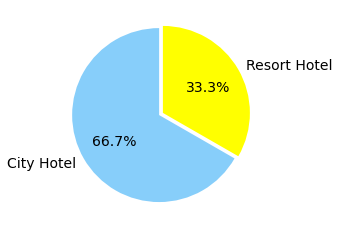

In [ ]:
labels = df['hotel'].value_counts().index.tolist()
sizes = df['hotel'].value_counts().tolist()
explode = (0,0.05)
colors = ['lightskyblue','yellow']

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',startangle=90,textprops={'fontsize':14})
plt.show()

In [ ]:
print('Total Booking canceled')
print(df.is_canceled.value_counts())
print('Cancelation percentage')
print(df.is_canceled.value_counts(normalize=True))

Total Booking canceled
not_canceled    74745
canceled        44153
Name: is_canceled, dtype: int64
Cancelation percentage
not_canceled    0.628648
canceled        0.371352
Name: is_canceled, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


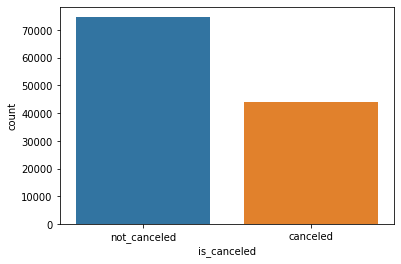

In [ ]:
df['is_canceled'] = df.is_canceled.replace([1,0],['canceled','not_canceled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

In [ ]:
df.arrival_date_year.value_counts(normalize=True)

2016    0.474651
2017    0.341503
2015    0.183847
Name: arrival_date_year, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


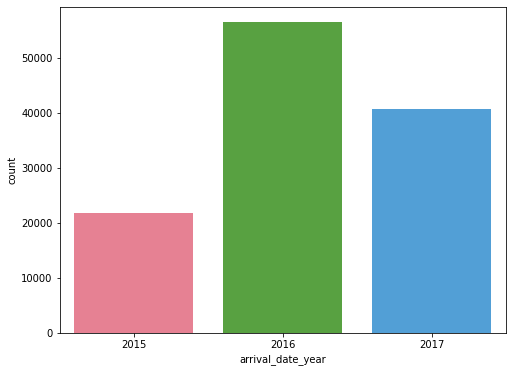

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['arrival_date_year'],palette='husl')
plt.show()

In [ ]:
df.arrival_date_month.value_counts(normalize=True)

August       0.116503
July         0.106209
May          0.099068
October      0.093315
April        0.092895
June         0.091902
September    0.088033
March        0.081911
February     0.067385
November     0.056788
December     0.056586
January      0.049404
Name: arrival_date_month, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


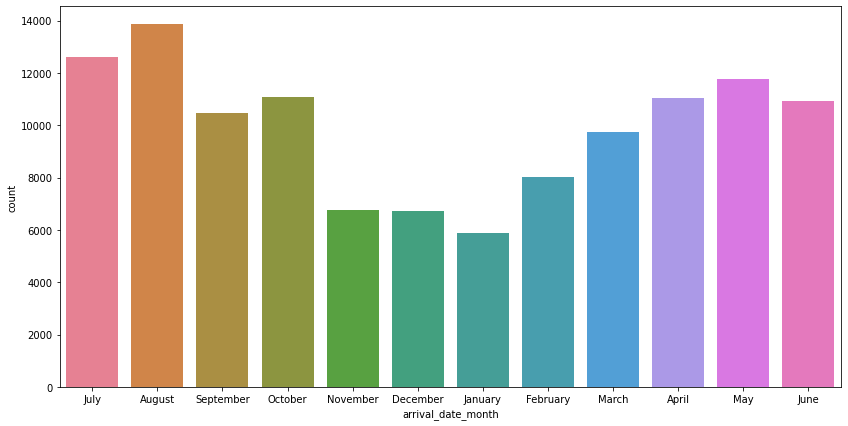

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['arrival_date_month'],palette='husl')
plt.show()

In [ ]:
df.market_segment.value_counts(normalize=True)

Online TA        0.474373
Offline TA/TO    0.203199
Groups           0.166580
Direct           0.104695
Corporate        0.042986
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


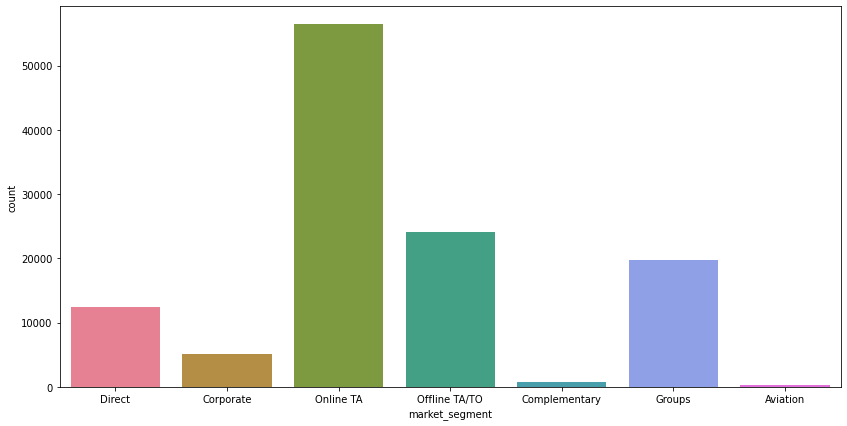

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['market_segment'],palette='husl')
plt.show()

In [ ]:
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


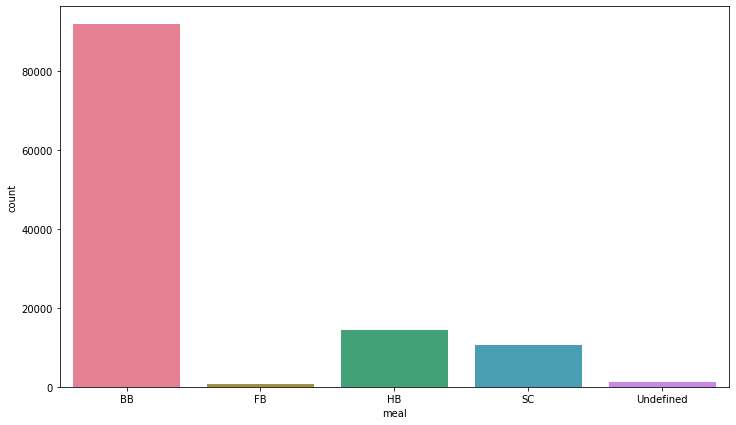

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['meal'],palette='husl')
plt.show()

In [ ]:
df.reserved_room_type.value_counts(normalize=True)

A    0.719953
D    0.161256
E    0.054643
F    0.024307
G    0.017519
B    0.009369
C    0.007830
H    0.005055
L    0.000050
P    0.000017
Name: reserved_room_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


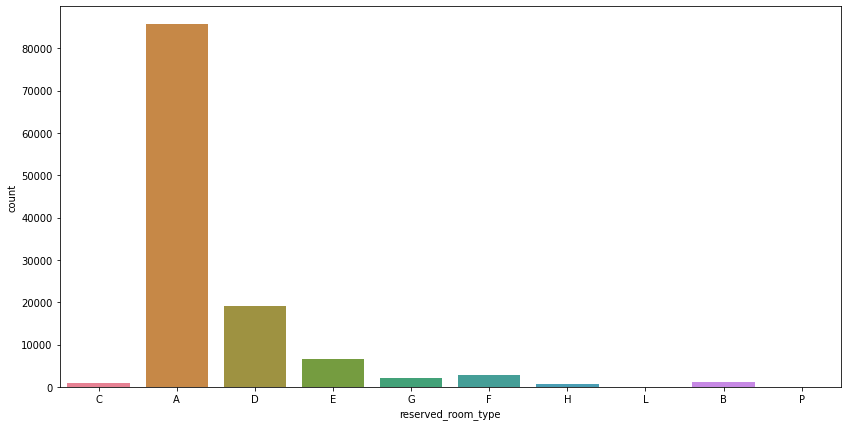

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['reserved_room_type'],palette='husl')
plt.show()

In [ ]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


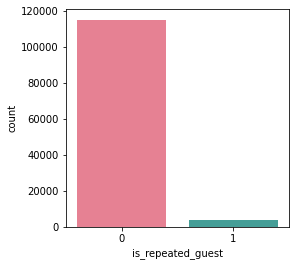

In [ ]:
plt.figure(figsize=(4,4))
sns.countplot(df['is_repeated_guest'],palette='husl')
plt.show()

In [ ]:
df.deposit_type.value_counts(normalize=True)

No Deposit    0.876070
Non Refund    0.122567
Refundable    0.001363
Name: deposit_type, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


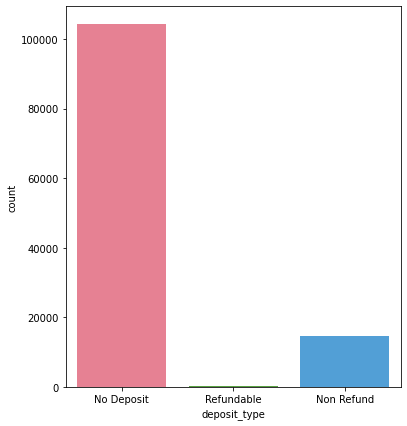

In [ ]:
plt.figure(figsize=(6,7))
sns.countplot(df['deposit_type'],palette='husl')
plt.show()

In [ ]:
df.required_car_parking_spaces.value_counts(normalize=True)

0    0.938519
1    0.061204
2    0.000235
3    0.000025
8    0.000017
Name: required_car_parking_spaces, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


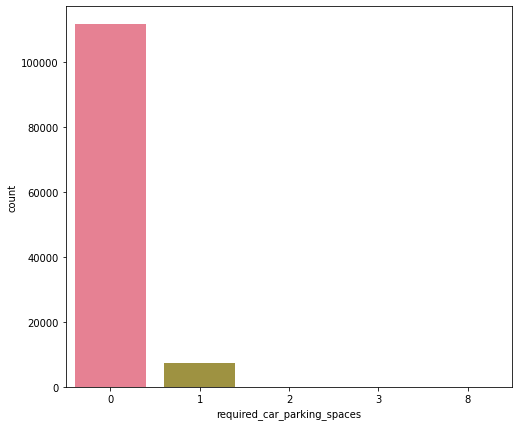

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df['required_car_parking_spaces'],palette='husl')
plt.show()

In [ ]:
df.reservation_status.value_counts(normalize=True)

Check-Out    0.628648
Canceled     0.361234
No-Show      0.010118
Name: reservation_status, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


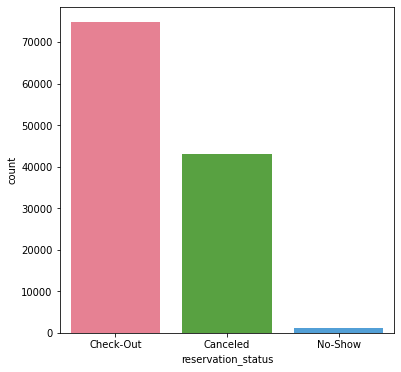

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(df['reservation_status'],palette='husl')
plt.show()

In [ ]:
df.stays_in_weekend_nights.value_counts(normalize=True)

0     0.434658
2     0.279643
1     0.256741
4     0.015551
3     0.010538
6     0.001287
5     0.000656
8     0.000505
7     0.000160
9     0.000093
10    0.000059
12    0.000042
16    0.000025
13    0.000025
14    0.000017
Name: stays_in_weekend_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


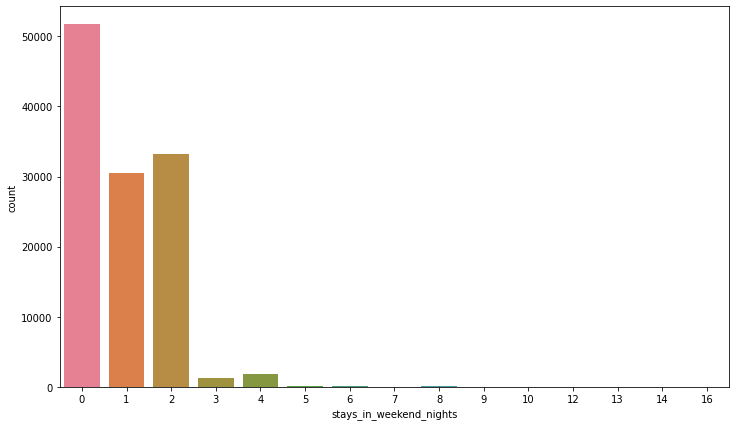

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(df['stays_in_weekend_nights'],palette='husl')
plt.show()

In [ ]:
df.stays_in_week_nights.value_counts(normalize=True)

2     0.282376
1     0.253082
3     0.186740
5     0.092945
4     0.080355
0     0.063861
6     0.012540
10    0.008663
7     0.008638
8     0.005501
9     0.001943
15    0.000715
11    0.000463
19    0.000370
12    0.000353
20    0.000345
14    0.000294
13    0.000227
16    0.000135
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
Name: stays_in_week_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


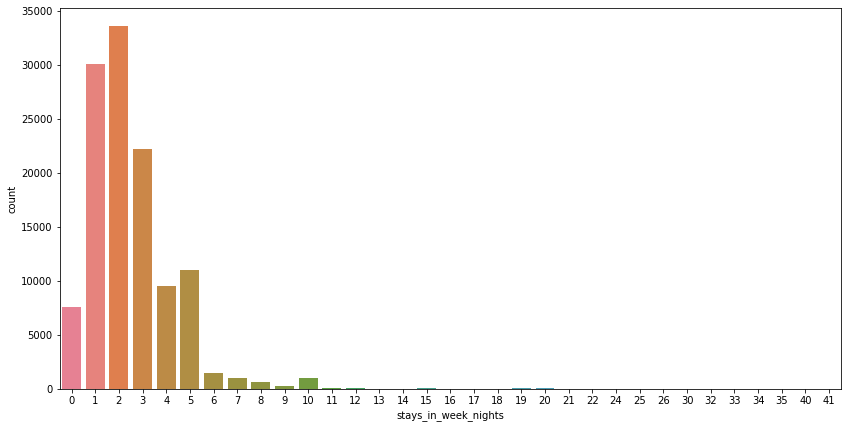

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['stays_in_week_nights'],palette='husl')
plt.show()

In [ ]:
df.adults.value_counts(normalize=True)

2     0.752704
1     0.191214
3     0.052120
0     0.003305
4     0.000521
26    0.000042
27    0.000017
20    0.000017
5     0.000017
55    0.000008
50    0.000008
40    0.000008
10    0.000008
6     0.000008
Name: adults, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


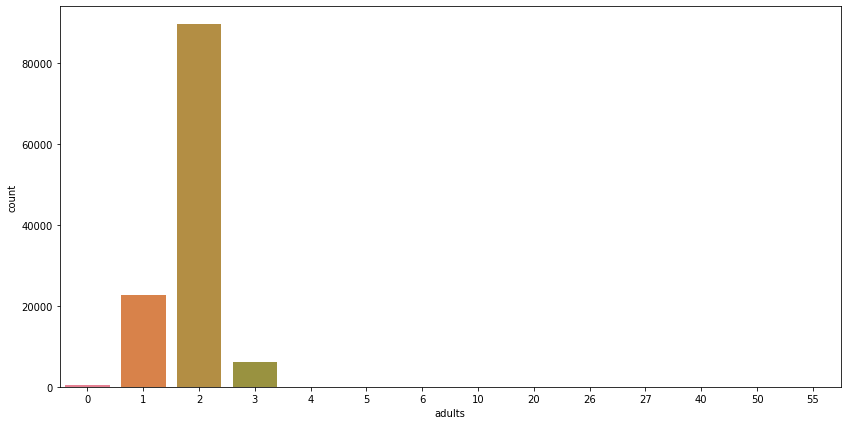

In [ ]:
plt.figure(figsize=(14,7))
sns.countplot(df['adults'],palette='husl')
plt.show()

In [ ]:
df.children.value_counts(normalize=True)

0.0     0.927846
1.0     0.040808
2.0     0.030699
3.0     0.000639
10.0    0.000008
Name: children, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


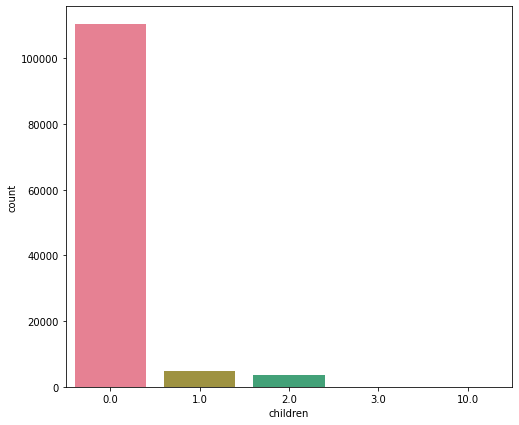

In [ ]:
plt.figure(figsize=(8,7))
sns.countplot(df['children'],palette='husl')
plt.show()

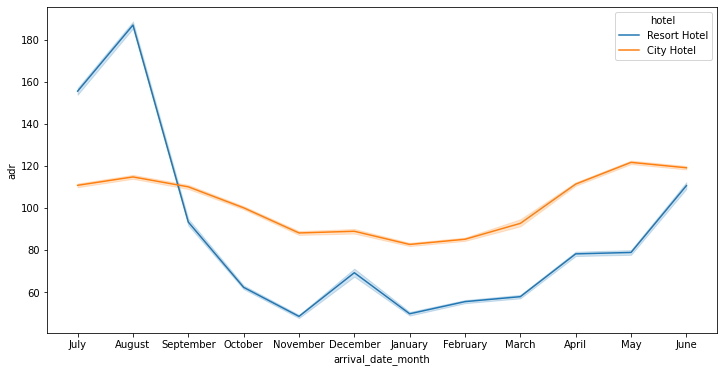

In [ ]:
plt.figure(figsize=(12,6))
sns.lineplot(x='arrival_date_month',y='adr',hue='hotel',data=df)
plt.show()